# Austin is the Live Music Capital of the World... and so much more.

## Introduciton

Austin is #1 City in the USA to live in. Google says that. And it's true! Beautiful weather, affordable living, planty of IT-related jobs. Approximately 150 people move to Austin every day! [1] That's impressive! Every family asks an important question: "Where in Austin should we live? What is the best and safest neighborhood for my children?" I will answer that question in my research. 


I'm going to use a 16 years of public crime reports from the Austin police department [2]. This dataset contains a record of incidents that the Austin Police Department responded to and wrote a report.

## What questions can we look into from this data set?

1. The most popular crimes
2. Tendency for the last 5 years
3. Crimes against Families: the worst and the safest Zip Codes



In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df_original = pd.read_csv('Desktop/Thinkful/Austin_crime.csv')
df_original.head(3)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2019891702,CRIMINAL TRESPASS,2716,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0,...,11.00,C,03/30/2019,NaN,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)"
1,20195013370,THEFT,600,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0,...,21.07,N,04/03/2019,23H,Theft,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)"
2,20172571868,AGG ROBBERY/DEADLY WEAPON,300,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0,...,18.04,O,09/20/2017,120,Robbery,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)"


## General Information

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124418 entries, 0 to 2124417
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate                   float64
Y-coordin

In [4]:
nRow, nCol = df_original.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2124418 rows and 27 columns


Making some changes to data set for easier manipulation and make it more readable.

In [5]:
df = df_original.copy()
del df['Incident Number']
del df['Highest Offense Code']
del df['Report Date Time']
del df['Report Date']
del df['Report Time']
del df['Clearance Status']
del df['Council District']
del df['APD Sector']
del df['Census Tract']
del df['UCR Category']
del df['X-coordinate']
del df['Y-coordinate']
del df['APD District']
del df['PRA']
del df['Clearance Date']

In [6]:
df.head(3)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Category Description,Latitude,Longitude,Location
0,CRIMINAL TRESPASS,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701.0,NaN,30.269060,-97.734085,"(30.26905967, -97.73408544)"
1,THEFT,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723.0,Theft,30.302208,-97.680177,"(30.30220794, -97.6801768)"
2,AGG ROBBERY/DEADLY WEAPON,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752.0,Robbery,30.333542,-97.705762,"(30.33354183, -97.70576196)"


### Let's take a look at the most popular crime overall.

So, at first, we have to answer the question: "How many different crimes do we have?"

In [7]:
df['Highest Offense Description'].unique()

array(['CRIMINAL TRESPASS', 'THEFT', 'AGG ROBBERY/DEADLY WEAPON',
       'FAMILY DISTURBANCE', 'POSS MARIJUANA', 'DISTURBANCE - OTHER',
       'BURGLARY OF VEHICLE', 'FORGERY - OTHER', 'THEFT OF SERVICE',
       'FORGERY AND PASSING', 'ASSAULT W/INJURY-FAM/DATE VIOL',
       'THEFT FROM PERSON', 'POSS OF DRUG PARAPHERNALIA', 'RAPE',
       'AUTO THEFT', 'BURGLARY OF RESIDENCE', 'TERRORISTIC THREAT',
       'PUBLIC INTOXICATION', 'DWI', 'VIOL STATE LAW - OTHER',
       'RECKLESS DAMAGE', 'THEFT BY SHOPLIFTING', 'IDENTITY THEFT',
       'GRAFFITI', 'CRIMINAL MISCHIEF', 'THEFT OF LICENSE PLATE',
       'DEBIT CARD ABUSE', 'DWI  .15 BAC OR ABOVE',
       'DWI - CHILD PASSENGER', 'DOC DISPLAY GUN/DEADLY PUB PLC',
       'DWI 2ND', 'POSS CONTROLLED SUB/NARCOTIC',
       'ASSAULT  CONTACT-SEXUAL NATURE', 'ASSAULT BY CONTACT',
       'DEL CONTROLLED SUB/NARCOTIC', 'HARASSMENT', 'EVADING / FOOT',
       'ASSAULT WITH INJURY', 'SUSPICIOUS PERSON',
       'RESISTING ARREST OR SEARCH', 'FRAUD - OT

OK. That's a lot! But how many??

In [8]:
print('There are',len(df['Highest Offense Description'].unique()), 'different types of crime in Austin.')

There are 410 different types of crime in Austin.


What sre the most popular? 

In [9]:
df['Highest Offense Description'].value_counts().head()

BURGLARY OF VEHICLE      212785
THEFT                    196673
FAMILY DISTURBANCE       161009
CRIMINAL MISCHIEF        117151
BURGLARY OF RESIDENCE     73760
Name: Highest Offense Description, dtype: int64

Text(0.5, 1.0, '20 the most committed crimes')

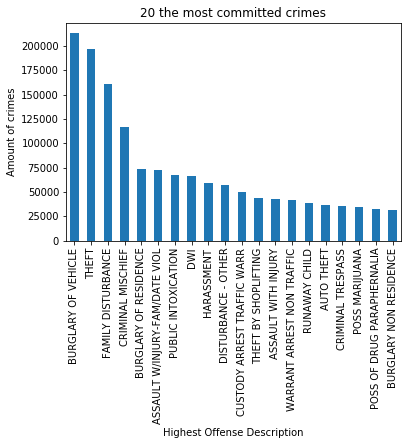

In [10]:
df['Highest Offense Description'].value_counts().head(20).plot(kind='bar')

plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")
plt.title('20 the most committed crimes')

We are interested in the first 20 the most committed crimes

In [11]:
top20 = df['Highest Offense Description'].value_counts().head(20).index
def desc_map(s):
    if s in top20: 
        return s 
    else: 
        return 'misc'

In [12]:
df['Description_Short']=df['Highest Offense Description'].apply(lambda x: desc_map(x))

In [13]:
df.head(3)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Category Description,Latitude,Longitude,Location,Description_Short
0,CRIMINAL TRESPASS,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701.0,NaN,30.269060,-97.734085,"(30.26905967, -97.73408544)",CRIMINAL TRESPASS
1,THEFT,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723.0,Theft,30.302208,-97.680177,"(30.30220794, -97.6801768)",THEFT
2,AGG ROBBERY/DEADLY WEAPON,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752.0,Robbery,30.333542,-97.705762,"(30.33354183, -97.70576196)",misc


In [14]:
df['Description_Short'].value_counts()

misc                              654071
BURGLARY OF VEHICLE               212785
THEFT                             196673
FAMILY DISTURBANCE                161009
CRIMINAL MISCHIEF                 117151
BURGLARY OF RESIDENCE              73760
ASSAULT W/INJURY-FAM/DATE VIOL     72306
PUBLIC INTOXICATION                67009
DWI                                66009
HARASSMENT                         58934
DISTURBANCE - OTHER                56855
CUSTODY ARREST TRAFFIC WARR        49490
THEFT BY SHOPLIFTING               43787
ASSAULT WITH INJURY                43096
WARRANT ARREST NON TRAFFIC         42129
RUNAWAY CHILD                      39008
AUTO THEFT                         36678
CRIMINAL TRESPASS                  35053
POSS MARIJUANA                     34843
POSS OF DRUG PARAPHERNALIA         32518
BURGLARY NON RESIDENCE             31254
Name: Description_Short, dtype: int64

In [15]:
df['Description_Short'].value_counts().index

Index(['misc', 'BURGLARY OF VEHICLE', 'THEFT', 'FAMILY DISTURBANCE',
       'CRIMINAL MISCHIEF', 'BURGLARY OF RESIDENCE',
       'ASSAULT W/INJURY-FAM/DATE VIOL', 'PUBLIC INTOXICATION', 'DWI',
       'HARASSMENT', 'DISTURBANCE - OTHER', 'CUSTODY ARREST TRAFFIC WARR',
       'THEFT BY SHOPLIFTING', 'ASSAULT WITH INJURY',
       'WARRANT ARREST NON TRAFFIC', 'RUNAWAY CHILD', 'AUTO THEFT',
       'CRIMINAL TRESPASS', 'POSS MARIJUANA', 'POSS OF DRUG PARAPHERNALIA',
       'BURGLARY NON RESIDENCE'],
      dtype='object')

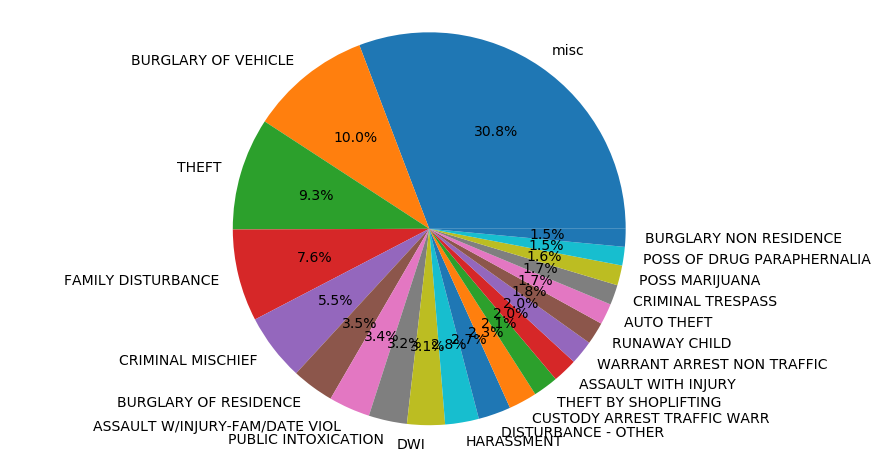

In [16]:
fig1, ax1 = plt.subplots(figsize=(15, 8))
labels = df['Description_Short'].value_counts().index
ax1.pie(df['Description_Short'].value_counts().sort_values(ascending=False), labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.axis('equal')

plt.show()

Now I want to clean a little bit my data.

In [17]:
df['year']= pd.to_datetime(df['Occurred Date'], format='%m/%d/%Y').dt.year
df['Zip Code'] = df['Zip Code'].apply(lambda x: str(x)[:5])
df.head(3)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Category Description,Latitude,Longitude,Location,Description_Short,year
0,CRIMINAL TRESPASS,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701,NaN,30.269060,-97.734085,"(30.26905967, -97.73408544)",CRIMINAL TRESPASS,2019
1,THEFT,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723,Theft,30.302208,-97.680177,"(30.30220794, -97.6801768)",THEFT,2019
2,AGG ROBBERY/DEADLY WEAPON,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752,Robbery,30.333542,-97.705762,"(30.33354183, -97.70576196)",misc,2017


# Crime per year

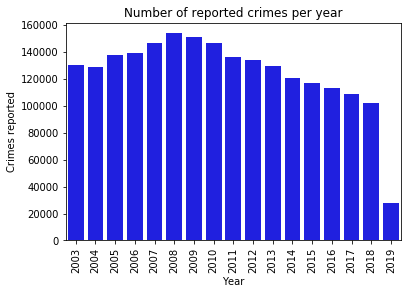

In [18]:
crimes_per_year = df['year'].value_counts().sort_index()

g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values, color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Year', ylabel='Crimes reported')
plt.title('Number of reported crimes per year')
plt.show()

Looks like there was a peak in crimes reported in 2008 but since then there's a steady decline. It's interesing to see the most popular crime in 2008. 

In [19]:
df[df.year==2008].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5)

Highest Offense Description
THEFT                  15670
BURGLARY OF VEHICLE    14296
FAMILY DISTURBANCE      9366
CRIMINAL MISCHIEF       9117
PUBLIC INTOXICATION     5921
Name: year, dtype: int64

Text(0.5, 1.0, '5 the most popular crimes in 2008')

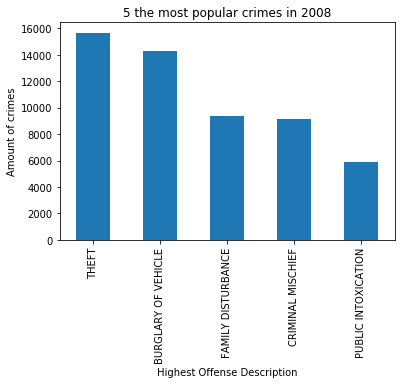

In [20]:
df[df.year==2008].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5).plot(kind = 'bar')

plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")

plt.title('5 the most popular crimes in 2008')

We see that the most committed crime in 2008 year is the theft.

Let's take a look at the most popular crimes for each year.

In [21]:
for i in np.sort(df.year.unique()):
    print(i)
    print(df[df.year==i].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5))



2003
Highest Offense Description
BURGLARY OF VEHICLE            16278
THEFT                           9840
CRIMINAL MISCHIEF               8349
FAMILY DISTURBANCE              7485
CUSTODY ARREST TRAFFIC WARR     5298
Name: year, dtype: int64
2004
Highest Offense Description
BURGLARY OF VEHICLE            15177
THEFT                          11429
FAMILY DISTURBANCE              7717
CRIMINAL MISCHIEF               7664
CUSTODY ARREST TRAFFIC WARR     5222
Name: year, dtype: int64
2005
Highest Offense Description
BURGLARY OF VEHICLE    15556
THEFT                  11953
FAMILY DISTURBANCE      9212
CRIMINAL MISCHIEF       8989
PUBLIC INTOXICATION     5280
Name: year, dtype: int64
2006
Highest Offense Description
BURGLARY OF VEHICLE    14481
THEFT                  13240
FAMILY DISTURBANCE      9695
CRIMINAL MISCHIEF       8680
PUBLIC INTOXICATION     5674
Name: year, dtype: int64
2007
Highest Offense Description
BURGLARY OF VEHICLE    16048
THEFT                  14565
FAMILY DISTURBANC

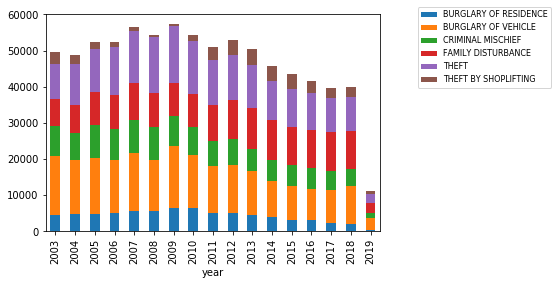

In [22]:
df[df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'THEFT BY SHOPLIFTING', 'BURGLARY OF RESIDENCE'])].groupby(['year', 'Highest Offense Description']).Location.count().sort_values(ascending=False).unstack().plot(kind='bar', legend='best', stacked=True)
plt.legend(loc='best', prop={'size': 8}, bbox_to_anchor=(1.1, 1.05))



### Conclusion: 
We see that "family disturbance" goes up and we take a look at it more detailed.
We will pay attention on "burglary of veicle", "criminal mischief" and "theft".

## Last 5 years

We want to see in more detail the crimes for the last 5 years.

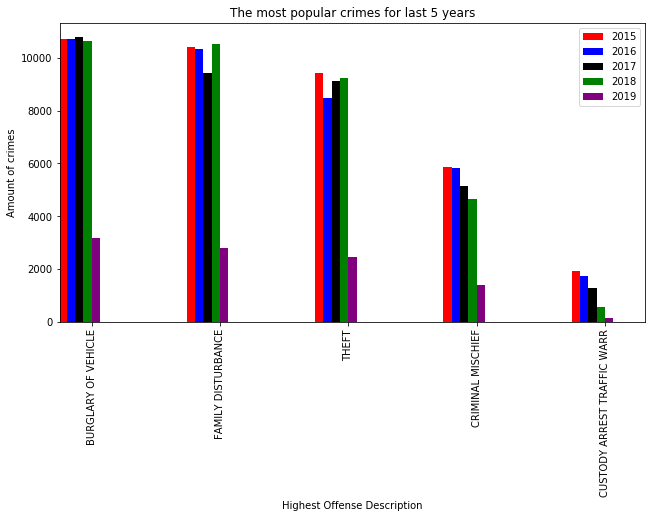

In [23]:

y_14 = df[(df.year==2014) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_15 = df[(df.year==2015) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_16 = df[(df.year==2016) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_17 = df[(df.year==2017) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_18 = df[(df.year==2018) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_19 = df[(df.year==2019) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.065

#y_14.plot(kind='bar', color='pink', ax=ax, width=width, position=5, label='2014')
y_15.plot(kind='bar', color='red', ax=ax, width=width, position=4, label='2015')
y_16.plot(kind='bar', color='blue', ax=ax, width=width, position=3, label='2016')
y_17.plot(kind='bar', color='black', ax=ax, width=width, position=2, label='2017')
y_18.plot(kind='bar', color='green',ax=ax, width=width, position=1, label='2018')
y_19.plot(kind='bar', color='purple',ax=ax, width=width, position=0, label='2019')
ax.legend(loc='upper right')


from matplotlib.pyplot import figure

fig.set_size_inches(10.5, 5.5)
fig.savefig('test2png.png', dpi=100)
plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")
plt.title('The most popular crimes for last 5 years')

plt.show()



On this chart, we can see that in general, all crimes go down except "Family Disturbance". In general, Austin is becoming safer.

## What are the most dangerous Zip Codes to live in?

In [24]:
#top 5 zip codes 
df.fillna(0, inplace=True)
df['Zip Code'] = df['Zip Code'].apply(lambda x: str(x)[:5])
Top5 = df[df['Zip Code']!='0.0']['Zip Code'].value_counts().sort_values(ascending=False).head(5)
Top5.index

Index(['78741', '78753', '78701', '78758', '78704'], dtype='object')

Text(0.5, 1.0, 'Zip Codes with the highest crime rate')

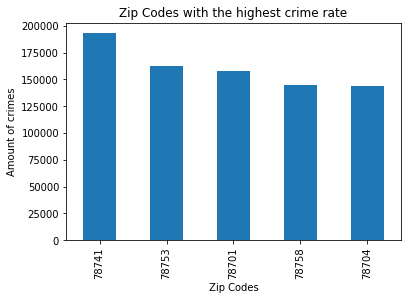

In [25]:
Top5.plot(kind='bar')
plt.xlabel("Zip Codes")
plt.ylabel("Amount of crimes")

plt.title('Zip Codes with the highest crime rate')

Adding some description and details.

In [26]:
Top5 = Top5.index
Top5_temp = df[(df['Zip Code']!='0.0') & (df['Zip Code'].isin(Top5))].groupby(['Zip Code', 'Highest Offense Description'])['Family Violence'].count().sort_values(ascending=False).reset_index()
Top5_temp = Top5_temp.groupby('Zip Code', as_index=False).apply(lambda x: x.nlargest(5, 'Family Violence')).reset_index()



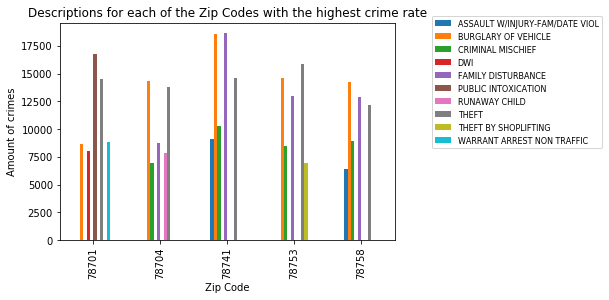

In [27]:
Top5_temp.pivot("Zip Code", "Highest Offense Description", "Family Violence").plot(kind='bar')

plt.legend(loc='best', prop={'size': 8}, bbox_to_anchor=(1.1, 1.05))

plt.ylabel("Amount of crimes")
plt.title('Descriptions for each of the Zip Codes with the highest crime rate')
plt.show() 

## Crimes against Families

What Are the Different Types of Crimes that can be committed against people health?
- Assault.
- Battery.
- False Imprisonment.
- Kidnapping.
- Homicide – crimes such as first and second degree murder, involuntary manslaughter, and vehicular homicide.
- Rape, statutory rape, sexual assault, and other offenses of a sexual nature.

We want to figure out the best neighbourhood to live in for a family. So we're going to gatheer all health-related data we have. 
So looking again in that list.

In [28]:
df['Highest Offense Description'].unique()

array(['CRIMINAL TRESPASS', 'THEFT', 'AGG ROBBERY/DEADLY WEAPON',
       'FAMILY DISTURBANCE', 'POSS MARIJUANA', 'DISTURBANCE - OTHER',
       'BURGLARY OF VEHICLE', 'FORGERY - OTHER', 'THEFT OF SERVICE',
       'FORGERY AND PASSING', 'ASSAULT W/INJURY-FAM/DATE VIOL',
       'THEFT FROM PERSON', 'POSS OF DRUG PARAPHERNALIA', 'RAPE',
       'AUTO THEFT', 'BURGLARY OF RESIDENCE', 'TERRORISTIC THREAT',
       'PUBLIC INTOXICATION', 'DWI', 'VIOL STATE LAW - OTHER',
       'RECKLESS DAMAGE', 'THEFT BY SHOPLIFTING', 'IDENTITY THEFT',
       'GRAFFITI', 'CRIMINAL MISCHIEF', 'THEFT OF LICENSE PLATE',
       'DEBIT CARD ABUSE', 'DWI  .15 BAC OR ABOVE',
       'DWI - CHILD PASSENGER', 'DOC DISPLAY GUN/DEADLY PUB PLC',
       'DWI 2ND', 'POSS CONTROLLED SUB/NARCOTIC',
       'ASSAULT  CONTACT-SEXUAL NATURE', 'ASSAULT BY CONTACT',
       'DEL CONTROLLED SUB/NARCOTIC', 'HARASSMENT', 'EVADING / FOOT',
       'ASSAULT WITH INJURY', 'SUSPICIOUS PERSON',
       'RESISTING ARREST OR SEARCH', 'FRAUD - OT

In [29]:
top5_zip = df[(df['Zip Code']!='0.0') & (df['Highest Offense Description'].isin(['ASSAULT W/INJURY-FAM/DATE VIOL', 'ASSAULT  CONTACT-SEXUAL NATURE', 'ASSAULT BY CONTACT', 'ASSAULT WITH INJURY', \
                                                                                                                       'AGG ASSAULT', 'ASSAULT BY THREAT', 'SEXUAL ASSAULT W/ OBJECT', 'ASSAULT BY CONTACT FAM/DATING', 'SEXUAL ASSAULT OF CHILD/OBJECT', \
                                                                                          'CRASH/INTOXICATION ASSAULT', 'AGG SEXUAL ASSAULT CHILD/OBJEC', \
                                                                                          'ASSAULT BY THREAT FAM/DATING', 'ASSAULT ON PUBLIC SERVANT', \
                                                                                          'AGG SEXUAL ASSAULT W OBJECT', 'AGG ASSAULT ON PUBLIC SERVANT', \
                                                                                          'ASSAULT - SCHOOL PERSONNEL', 'AGG KIDNAPPING', \
                                                                                          'KIDNAPPING', 'AGG KIDNAPPING FAM VIO',\
                                                                                          'KIDNAPPING FAM VIO', 'CAPITAL MURDER', \
                                                                                          'MURDER', 'RAPE', 'AGG RAPE OF A CHILD', 'STATUTORY RAPE OF CHILD', \
                                                                                          'AGG RAPE', 'RAPE OF A CHILD']) ) ]['Zip Code'].value_counts().sort_values(ascending=False).head(5).index

In [30]:
print('Here they are the most dangerous  Zip Codes in Austin: ', top5_zip)

Here they are the most dangerous  Zip Codes in Austin:  Index(['78741', '78753', '78758', '78701', '78751'], dtype='object')


In [31]:
#top 5 descriptions for top 5 zip codes 

temp=df[(df['Zip Code']!='0.0') & df['Zip Code'].isin(top5_zip) ].groupby(['Zip Code', 'Highest Offense Description'])['Family Violence'].count().reset_index()

temp = temp.groupby('Zip Code', as_index=False).apply(lambda x: x.nlargest(5, 'Family Violence')).reset_index()


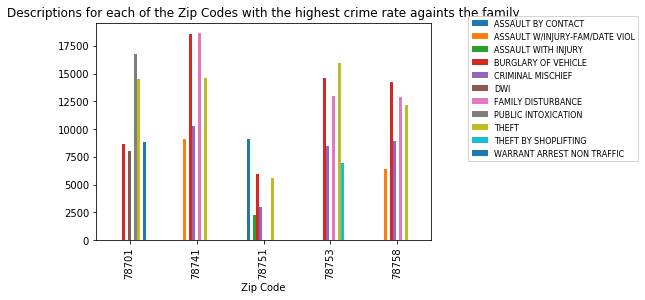

In [32]:
temp.pivot("Zip Code", "Highest Offense Description", "Family Violence").plot(kind='bar')

plt.legend(loc='best', prop={'size': 8}, bbox_to_anchor=(1.1, 1.05))
plt.title('Descriptions for each of the Zip Codes with the highest crime rate againts the family')
plt.show() 

Here we can take a look at the most dangerous Zip Code:

In [45]:
df[df['Zip Code'] == '78741'].groupby('Highest Offense Description')["Location Type"].count().sort_values(ascending = False).head(10)


Highest Offense Description
FAMILY DISTURBANCE                18664
BURGLARY OF VEHICLE               18589
THEFT                             14586
CRIMINAL MISCHIEF                 10275
ASSAULT W/INJURY-FAM/DATE VIOL     9103
BURGLARY OF RESIDENCE              8524
PUBLIC INTOXICATION                6252
CUSTODY ARREST TRAFFIC WARR        5952
DWI                                5404
HARASSMENT                         5105
Name: Location Type, dtype: int64

Text(0.5, 1.0, '10 the most committed crimes')

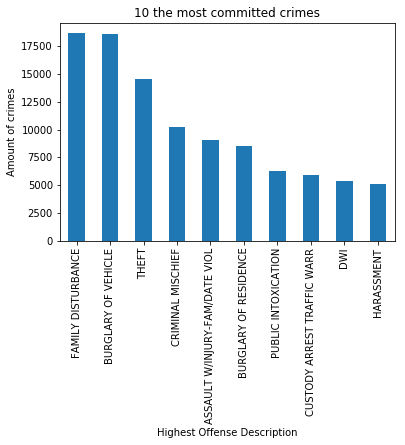

In [46]:
df[df['Zip Code'] == '78741'].groupby('Highest Offense Description')["Location Type"].count().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")

plt.title('10 the most committed crimes')

Now we want to know the safest Zip Codes

In [35]:
top5_zip_safe = df[(df['Zip Code']!='0.0') & (df['Highest Offense Description'].isin(['ASSAULT W/INJURY-FAM/DATE VIOL', 'ASSAULT  CONTACT-SEXUAL NATURE', 'ASSAULT BY CONTACT', 'ASSAULT WITH INJURY', \
                                                                                                                       'AGG ASSAULT', 'ASSAULT BY THREAT', 'SEXUAL ASSAULT W/ OBJECT', 'ASSAULT BY CONTACT FAM/DATING', 'SEXUAL ASSAULT OF CHILD/OBJECT', \
                                                                                          'CRASH/INTOXICATION ASSAULT', 'AGG SEXUAL ASSAULT CHILD/OBJEC', \
                                                                                          'ASSAULT BY THREAT FAM/DATING', 'ASSAULT ON PUBLIC SERVANT', \
                                                                                          'AGG SEXUAL ASSAULT W OBJECT', 'AGG ASSAULT ON PUBLIC SERVANT', \
                                                                                          'ASSAULT - SCHOOL PERSONNEL', 'AGG KIDNAPPING', \
                                                                                          'KIDNAPPING', 'AGG KIDNAPPING FAM VIO',\
                                                                                          'KIDNAPPING FAM VIO', 'CAPITAL MURDER', \
                                                                                          'MURDER', 'RAPE', 'AGG RAPE OF A CHILD', 'STATUTORY RAPE OF CHILD', \
                                                                                          'AGG RAPE', 'RAPE OF A CHILD']) ) ]['Zip Code'].value_counts().sort_values(ascending=False).tail(10).index

In [36]:
print('Here they are the most sefest  Zip Codes in Austin: ', top5_zip_safe)

Here they are the most sefest  Zip Codes in Austin:  Index(['78641', '78738', '76574', '78640', '78612', '78620', '78621', '78645',
       '78669', '78634'],
      dtype='object')


In [37]:
#top 5 descriptions for top 10 zip codes - this is beacuse dispalying all zip codes can be too much in one plot 

temp1=df[(df['Zip Code']!='0.0') & df['Zip Code'].isin(top5_zip_safe) ].groupby(['Zip Code', 'Highest Offense Description'])['Family Violence'].count().reset_index()

temp1 = temp1.groupby('Zip Code', as_index=False).apply(lambda x: x.nlargest(5, 'Family Violence')).reset_index()

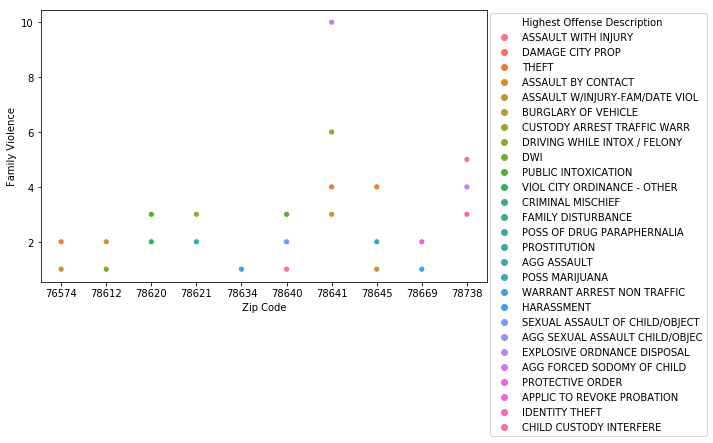

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=temp1['Zip Code'], y=temp1['Family Violence'], hue=temp1['Highest Offense Description'])
plt.legend(bbox_to_anchor=(1, 1), loc=0, borderaxespad=0.3)

In [75]:
import folium
from folium import plugins
crime_coords = df[(df['Latitude'].isnull() == False) 
                  & (df['Longitude'].isnull() == False)
                 & (df['Highest Offense Description'] == 'DWI')
                 & (df['year'] == 2018)][['Latitude','Longitude']]

In [76]:

map1 = folium.Map(location=[30.285516,-97.736753 ],tiles='OpenStreetMap', zoom_start=10)
map1.add_child(plugins.HeatMap(crime_coords[['Latitude', 'Longitude']].values, radius=15))
map1

# t-test

If we do an independent T-test to compare the two means of two different crimes, what would we see?
Our null hypothesis: No significant difference between the two crimes: 'FAMILY DISTURBANCE' and POSS MARIJUANA. 

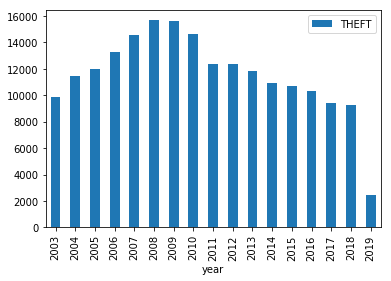

In [39]:
THEFT = df[df['Highest Offense Description']=='THEFT'].groupby('year')['Highest Offense Description'].count().plot(kind = 'bar')

plt.legend(['THEFT'])

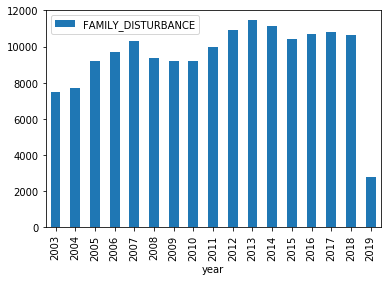

In [40]:
FAMILY_DISTURBANCE = df[df['Highest Offense Description']=='FAMILY DISTURBANCE'].groupby('year')['Highest Offense Description'].count().plot(kind = 'bar')
plt.legend(['FAMILY_DISTURBANCE'])

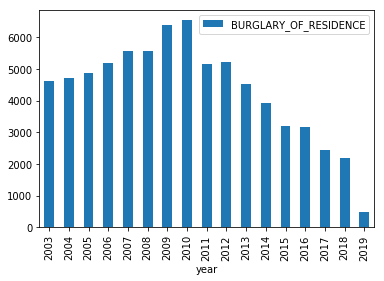

In [41]:
BURGLARY_OF_RESIDENCE = df[df['Highest Offense Description']=='BURGLARY OF RESIDENCE'].groupby('year')['Highest Offense Description'].count().plot(kind = 'bar')
plt.legend(['BURGLARY_OF_RESIDENCE'])

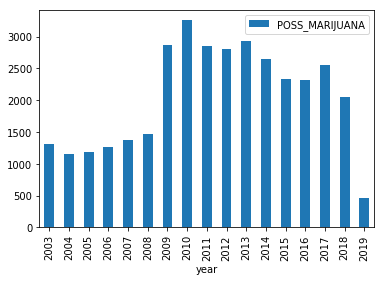

In [42]:
POSS_MARIJUANA = df[df['Highest Offense Description']=='POSS MARIJUANA'].groupby('year')['Highest Offense Description'].count().plot(kind = 'bar')
plt.legend(['POSS_MARIJUANA'])

9471.117647058823
2049.5882352941176
1985.1669623767446
799.783283795093
-7421.529411764706
Ttest_indResult(statistic=-13.87059236842583, pvalue=4.611286676899484e-12)


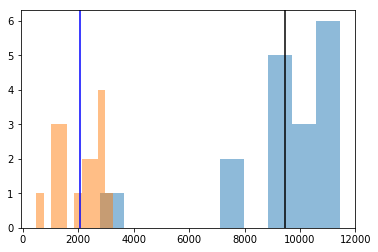

In [43]:

# Creating a samples
sample1 = df[df['Highest Offense Description']=='FAMILY DISTURBANCE'].groupby('year')['Highest Offense Description'].count().values

sample2 = df[df['Highest Offense Description']=='POSS MARIJUANA'].groupby('year')['Highest Offense Description'].count().values

#sample1.values


mean_sample1 = np.mean(sample1)
st_dev_sample1 = np.std(sample1)


plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 

mean_sample2 = np.mean(sample2)
st_dev_sample2 = np.std(sample2)

plt.axvline(x=mean_sample1, linestyle='solid', color='black')
#plt.axvline(x=mean_sample1+st_dev_sample1, linestyle='dashed', color='black')
#plt.axvline(x=mean_sample1-st_dev_sample1, linestyle='dashed', color='black')

plt.axvline(x=mean_sample2, linestyle='solid', color='blue')
#plt.axvline(x=mean_sample2+st_dev_sample2, linestyle='dashed', color='blue')
#plt.axvline(x=mean_sample2-st_dev_sample2, linestyle='dashed', color='blue')

#plt.legend(loc='upper right') 
#plt.show()

# Calculate the means and standard deviations of our samples.

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

print(ttest_ind(sample2, sample1, equal_var=False))



And since our p-value is very low we can say there is very low percent we have different values by mistake and indeed we have different distributions.
The only caveat is the normality assumption of t-test might not be met in our data, so we are also using Mann Whitney u-test which doesn’t require normal distribution. 

In [44]:
mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=5.0, pvalue=8.437240512017028e-07)

## Conclusions

The peak in crimes reported in 2008 but since then there's a steady decline: all crimes go down except "Family Disturbance". In general, Austin is becoming safer. 
The most dangerous Zip Codes to live in: '78741', '78753', '78701', '78758', '78704'. 
The most dangerous Zip Codes in Austin for families: '78741', '78753', '78758', '78701', '78751' (almost the same)
The most sefest Zip Codes in Austin: '78641', '78738', '76574', '78640', '78620', '78612', '78621', '78669', '78634', '78645'

Next Steps:  
    
We can make our analysis more detailed if we split Zip Codes to 4 different cities: Austin, Round Rock, Cedar Park, and Leander.  We can visualize the result on a map. And we can predict the amount of crime at the end of the year 2019. 



Links:
[1] https://www.bizjournals.com/austin/news/2018/03/22/austins-population-keeps-popping-heres-how-many.html
[2] data.texas.gov